## Aim: To get familiar with OpenCV operations
### Note: Use matplotlib to display images and write the code after the #Answer comment
### Grade points = 10%
### Please submit the notebook as the submission and make sure output for each cell is displayed and all cells are executed

## Important Note: Please submit your original work and don't share your work with others

In [68]:
import cv2
import numpy as np
import imutils
from skimage.feature import hog
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1

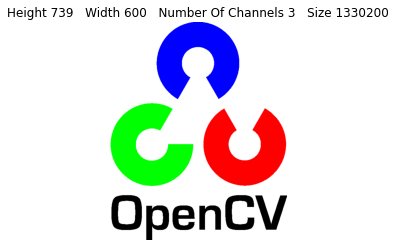

(739, 600, 3)
1330200


In [56]:
#read image opencv-logo
#display shape and size of the image

#Answer
logo = cv2.imread("opencv-logo.png",cv2.IMREAD_COLOR)
dimension=logo.shape
img_size=logo.size
plt.imshow(logo)
plt.axis('off')
plt.title("Height {}   Width {}   Number Of Channels {}   Size {}".format(dimension[0],dimension[1],dimension[2],img_size))
plt.show()
print(logo.shape)
print(logo.size)

### Question 2

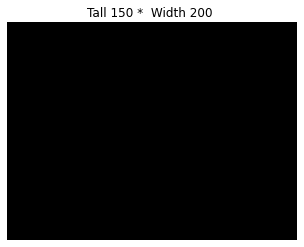

(150, 200)


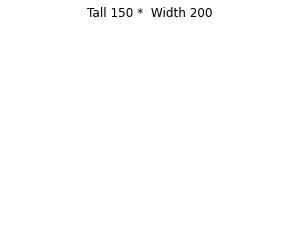

(150, 200)


In [80]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image

#Answer

blck_imge=np.zeros((150,200,3),dtype=np.uint8)
plt.imshow(blck_imge)
plt.axis('off')
plt.title("Tall {} *  Width {} ".format(blck_imge.shape[0],blck_imge.shape[1]))
plt.show()
print(sample.shape)

whte_imge = np.ones((150,200,3),dtype=np.uint8)
whte_imge.fill(255)
plt.axis('off')
plt.imshow(whte_imge)
plt.title("Tall {} *  Width {} ".format(whte_imge.shape[0],whte_imge.shape[1]))
plt.show()
print(sample.shape)

### Question 3

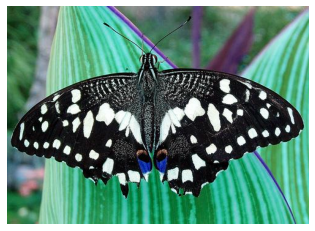

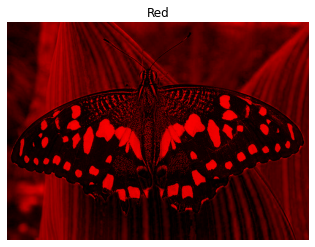

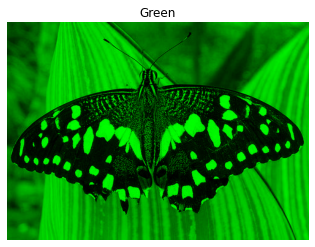

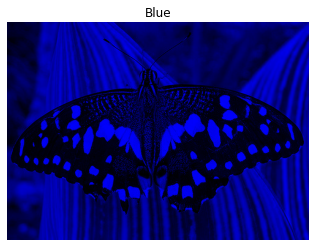

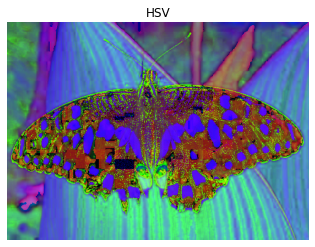

In [84]:
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

#Answer
butterfly = cv2.imread("butterfly.jpg",cv2.IMREAD_COLOR)
plt.imshow(butterfly)
plt.axis('off')
plt.show()

#RGB Channel
red = butterfly.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0
plt.title('Red')
plt.imshow(red)
plt.axis('off')
plt.show()

green = butterfly.copy() 
green[:, :, 0] = 0
green[:, :, 2] = 0
plt.title('Green')
plt.imshow(green)
plt.axis('off')
plt.show()

blue = butterfly.copy()

blue[:, :, 0] = 0
blue[:, :, 1] = 0
plt.title('Blue')
plt.axis('off')
plt.imshow(blue)
plt.show()



#HSV color space
hsv = cv2.cvtColor(butterfly, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.axis('off')
plt.title('HSV')
plt.show()

### Question 4

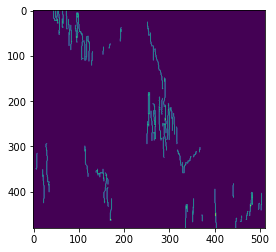

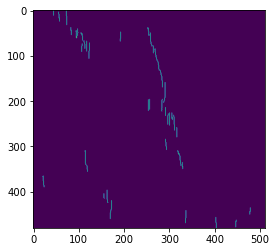

In [48]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

#Answer

thresh = cv2.imread("thresh.jpg",cv2.IMREAD_COLOR)

#Gaussuan blur
gaus_img = cv2.GaussianBlur(thresh, (5, 55), 0)

kernel = np.ones((5,5), np.uint8)

#Dilation,Erosion,Opening&Closing
thresh_erosion = cv2.erode(thresh, kernel, iterations=1)

thresh_dilation = cv2.dilate(thresh, kernel, iterations=1)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

#gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)

wide = cv2.Canny(gaus_img, 10, 200)
plt.imshow(wide)
plt.show()
narrow = cv2.Canny(gaus_img, 200, 240)
plt.imshow(narrow)
plt.show()


### Question 5

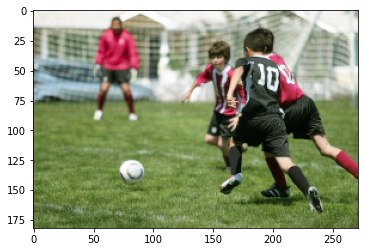

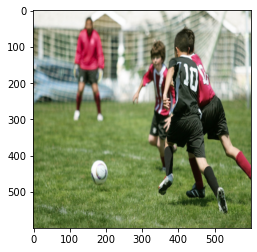

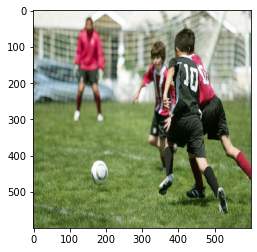

In [54]:
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

#Answer

players = cv2.imread("players.jpg",cv2.IMREAD_COLOR)

half_img = cv2.resize(players, (0,0), fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(half_img, cv2.COLOR_BGR2RGB))
plt.show()

strtch_img1 = cv2.resize(players, (600, 600), fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(strtch_img1, cv2.COLOR_BGR2RGB))
plt.show()

strtch_img2 = cv2.resize(players, (600, 600),fx=0.5, fy=0.5, interpolation= cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(strtch_img2, cv2.COLOR_BGR2RGB))
plt.show()



### Question 6

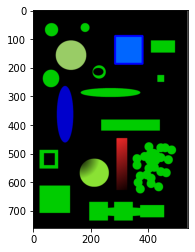

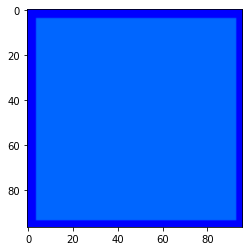

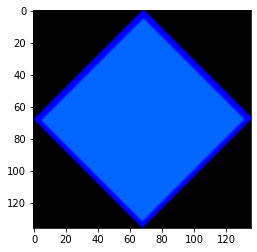

In [62]:
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

#Answer
players = cv2.imread("detect_blob.png",cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(players, cv2.COLOR_BGR2RGB))
dimension = players.shape
center = (dimension[0]//2,dimension[1]//2)
rectangle = cv2.rectangle(players, pt1 = (286,90), pt2 = (382,187), 
              color = (255, 0, 0), thickness = 5)
plt.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
plt.show()

crop_img = rectangle[90:187, 286:382]
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

roi = players[90:187, 286:382]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.show()

rotated = imutils.rotate_bound(roi, 45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

### Question 7

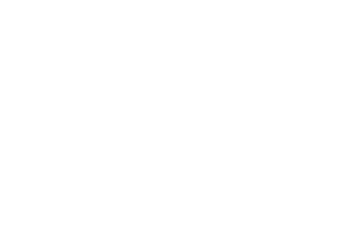

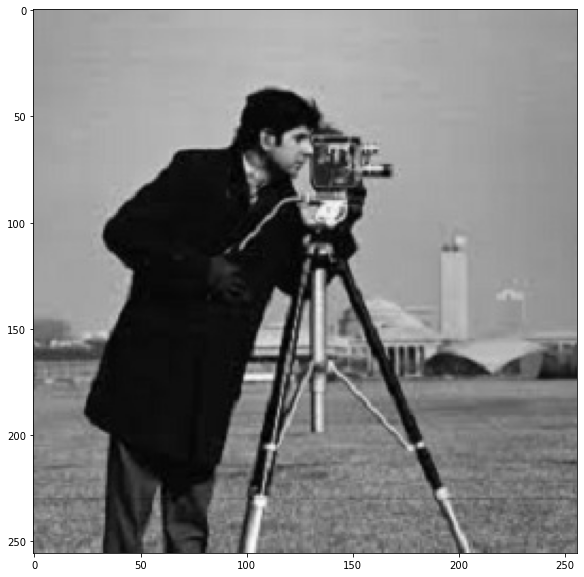

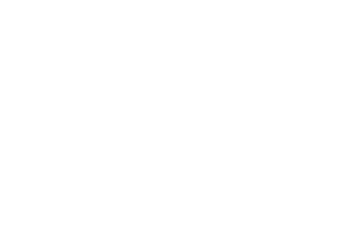

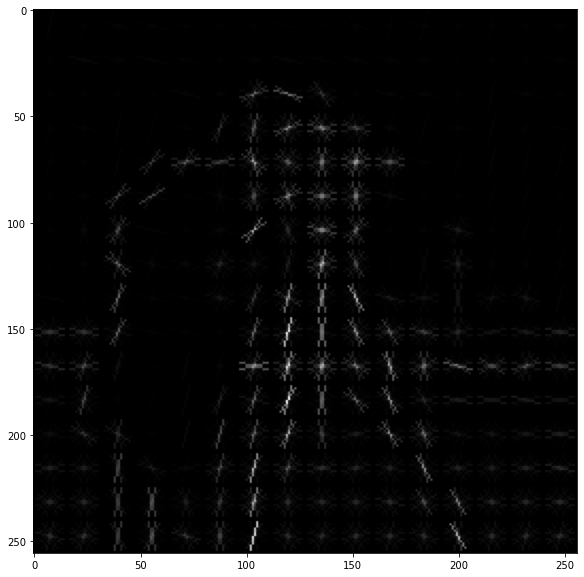

In [72]:
#read in the cameraman image
#Here we want to implement HOG to compute HOG descriptors of the image
#For HOG, use these as arguments orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1)
#Display the original image as well as the resultant image

#Answer
cameraman = cv2.imread("cameraman.jpg")
plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(cameraman)
plt.show()

fd, hog_image = hog(cameraman, orientations=8, pixels_per_cell=(16, 16),
                	cells_per_block=(1,1), visualize=True, multichannel=True)
plt.axis('off')
plt.figure(figsize=(10, 10))
plt.imshow(hog_image, cmap="gray")
plt.show()

### Question 8

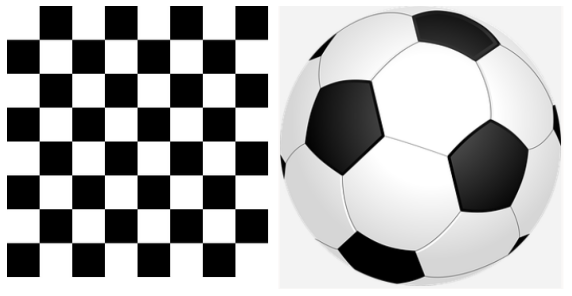

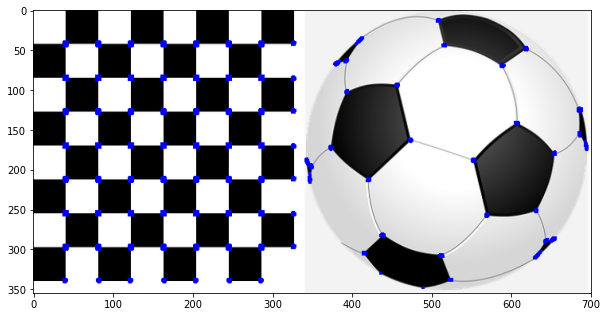

In [76]:
#read in the chess_football image
#Here we want to implement Harris Corner detection
#use  k =0.001
#Display the original image as well as the resultant image

#Answer
chess = cv2.imread("chess_football.png")
plt.figure(figsize=(10, 10))
plt.imshow(chess)
plt.axis('off')
plt.show()

imge_gray = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)  
imge_gray = np.float32(imge_gray)  
hcd_imge = cv2.cornerHarris(imge_gray, 3, 5, 0.001)  
hcd_imge = cv2.dilate(hcd_imge, None) 

chess[hcd_imge > 0.01 * hcd_imge.max()]=[0, 0, 255]
plt.figure(figsize=(10, 10))
plt.imshow(chess) 
plt.show()